## Import and Load data file

In [7]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random

words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('intents.json').read()
intents = json.loads(data_file)

## Pre-process data

Here we iterate through the patterns and tokenize the sentence using nltk.word_tokenize() function and append each word in the words list. We also create a list of classes for our tags.

In [8]:
for intent in intents['intents']:
    for pattern in intent['patterns']:

        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))

        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

lemmatize each word and remove duplicate words from the list

In [9]:
# lemmatize, lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print (len(documents), "documents")
# classes = intents
print (len(classes), "classes", classes)
# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)

pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

108 documents
25 classes ['Identity', 'activity', 'age', 'app_explanation', 'appreciate', 'contact', 'free_mode', 'goodbye', 'greeting', 'haha', 'help', 'how_to_use', 'identify_movie_genre', 'intro', 'jokes', 'mode_comparison', 'need_more_info', 'pro_mode', 'programmer', 'suggest', 'technical_issues', 'techniques_used', 'thanks', 'whatsup', 'yuan']
148 unique lemmatized words ["'s", ',', '.', '1', '2', '3', 'a', 'about', 'afternoon', 'age', 'and', 'anyone', 'app', 'appreciate', 'are', 'assistance', 'available', 'awesome', 'bad', 'benefit', 'best', 'between', 'bye', 'can', 'chatting', 'compare', 'contact', 'crash', 'creator', 'data', 'day', 'designed', 'developer', 'differ', 'difference', 'do', 'doe', 'doing', 'employed', 'error', 'evening', 'explain', 'facing', 'feature', 'for', 'free', 'from', 'funny', 'genre', 'good', 'goodbye', 'great', 'guide', 'haha', 'he', 'hello', 'help', 'helpful', 'helping', 'here', 'hey', 'hi', 'hola', 'how', 'i', 'identifier', 'identify', 'in', 'information'

## Create training and testing data

In [10]:
training = []
output_empty = [0] * len(classes)

for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    
    training.append([bag, output_row])

random.shuffle(training)
train_x = np.array([x[0] for x in training])  # Extracting bag of words
train_y = np.array([x[1] for x in training])  # Extracting intents


## Create Model

In [11]:
from tensorflow.keras.optimizers import SGD #Stochastic Gradient Descent (SGD)

# Create model
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model with updated optimizer definition
sgd = SGD(learning_rate=0.001, momentum=0.9, nesterov=True) #Nesterov Accelerated Gradient (NAG)adjusts the way the gradient is calculated, allowing for better convergence and often faster training. 
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=1000, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)

print("Model created and saved")


Epoch 1/1000
22/22 [==============================] - 0s 2ms/step - loss: 3.2546 - accuracy: 0.0556
Epoch 2/1000
22/22 [==============================] - 0s 1ms/step - loss: 3.2329 - accuracy: 0.0556
Epoch 3/1000
22/22 [==============================] - 0s 1ms/step - loss: 3.2159 - accuracy: 0.0648
Epoch 4/1000
22/22 [==============================] - 0s 1ms/step - loss: 3.2075 - accuracy: 0.0278
Epoch 5/1000
22/22 [==============================] - 0s 1ms/step - loss: 3.2121 - accuracy: 0.0833
Epoch 6/1000
22/22 [==============================] - 0s 1ms/step - loss: 3.1768 - accuracy: 0.1019
Epoch 7/1000
22/22 [==============================] - 0s 1ms/step - loss: 3.1870 - accuracy: 0.1019
Epoch 8/1000
22/22 [==============================] - 0s 1ms/step - loss: 3.1667 - accuracy: 0.1111
Epoch 9/1000
22/22 [==============================] - 0s 1ms/step - loss: 3.1543 - accuracy: 0.1204
Epoch 10/1000
22/22 [==============================] - 0s 1ms/step - loss: 3.1745 - accuracy: 0.1389

C:\Users\wengj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model created and saved


## visualize the training history

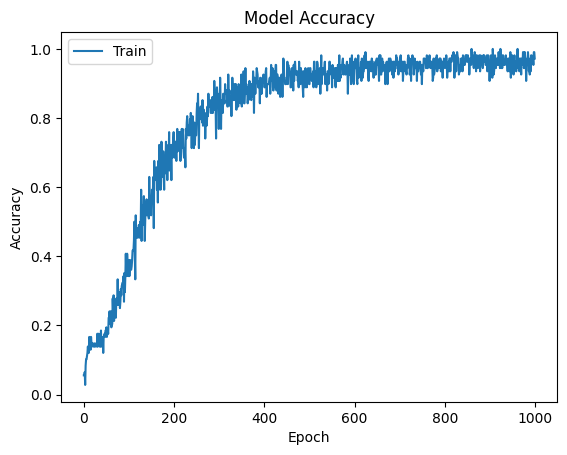

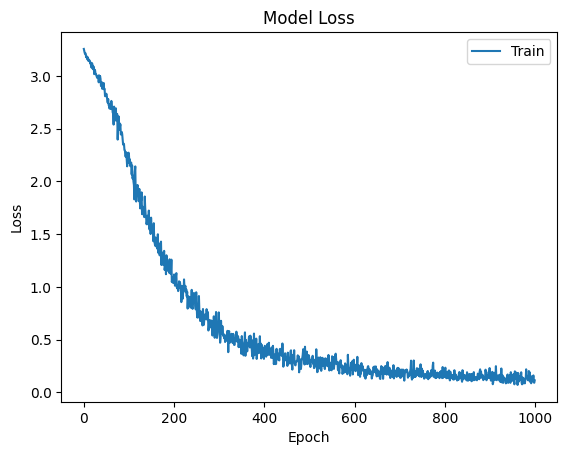

In [12]:
import matplotlib.pyplot as plt

# Plotting accuracy history
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plotting loss history
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()
